In [1]:
import numpy as np
import random
import numpy.linalg as lia
import pandas as pd
import h5py
import random
import math
import matplotlib.pyplot as plt

In [2]:
def loadBGRImage(path):
    image = BGR(cv.imread(path))
    return image

def loadGreyImage(path):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    return image

def BGR(image):
    image = cv.cvtColor(image,cv.COLOR_RGB2BGR)
    return image

def displayGreyImage(image,imageName):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap='gray')
    plt.title(imageName)
    plt.show()
def displayGreyWindows(image,imageName):
    plt.figure(figsize=(3,3))
    plt.imshow(image, cmap='gray')
    plt.title(imageName)
    plt.show()
    
def displayBGRImage(image,imageName, size):
    plt.figure(figsize=(size,size))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def displayBGRImageLarge(image,imageName):
    plt.figure(figsize=(18,18))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def imageSideBySide(images,imageNames,size):
    row = np.ceil(len(images)/20)
    fig=plt.figure(figsize=(size, size/2))
    for i,image in enumerate(images):
        fig.add_subplot(row,20,i+1)
        plt.imshow(image, cmap='gray')
        plt.title(imageNames[i])
    plt.show()

    

In [3]:
start = 25,26
size = 14,12
f = h5py.File('MNIST_synthetic.h5', 'r')
list(f.keys())

['test_dataset', 'train_dataset', 'train_labels']

In [5]:

train_dataset = np.squeeze(np.array(f["train_dataset"])).copy()
test_dataset = np.squeeze(np.array(f["test_dataset"])).copy()
train_labels = np.squeeze(np.array(f["train_labels"])).copy()

singulars_digit_list = []
singulars_label_list = []

doubles_digit_list = []
doubles_label_list = []

tripples_digit_list = []
tripples_label_list = []

quadruples_digit_list = []
quadruples_label_list = []

quintuples_digit_list = []
quintuples_label_list = []


for i, labels in enumerate(train_labels):
    
    if labels[1]==10:
        singulars_digit_list.append(train_dataset[i])
        singulars_label_list.append(train_labels[i])
        
    if labels[1]!=10 and labels[2]==10:
        doubles_digit_list.append(train_dataset[i])
        doubles_label_list.append(train_labels[i])
        
    if labels[2]!=10 and labels[3]==10:
        tripples_digit_list.append(train_dataset[i])
        tripples_label_list.append(train_labels[i])
        
    if labels[3]!=10 and labels[4]==10:
        quadruples_digit_list.append(train_dataset[i])
        quadruples_label_list.append(train_labels[i])
        
    if labels[4]!=10:
        quintuples_digit_list.append(train_dataset[i])
        quintuples_label_list.append(train_labels[i])

In [6]:
singulars_digit = np.array(singulars_digit_list)     
doubles_digit = np.array(doubles_digit_list)  
tripples_digit = np.array(tripples_digit_list)    
quadruples_digit = np.array(quadruples_digit_list)    
quintuples_digit = np.array(quintuples_digit_list)    

singulars_label = np.array(singulars_label_list).T[0]
doubles_label = np.array(doubles_label_list).T[0:2].T
tripples_label = np.array(tripples_label_list).T[0:3].T
quadruples_label = np.array(quadruples_label_list).T[0:4].T
quintuples_label = np.array(quintuples_label_list).T[0:5].T

#print(doubles_label)


In [8]:
singular_dataset_focus = []
singular_label_focus = list(singulars_label)
for i, digit in enumerate(singulars_digit):
    singular_dataset_focus.append(digit[26:39,26:39])
    
doubles_dataset_focus = []
doubles_label_focus = []
for i, digit in enumerate(doubles_digit):
    doubles_dataset_focus.append(digit[26:39,20:33])
    doubles_dataset_focus.append(digit[26:39,32:45])
    doubles_label_focus.append(doubles_label[i][0])
    doubles_label_focus.append(doubles_label[i][1])

tripples_dataset_focus = []
tripples_label_focus = []
for i, digit in enumerate(tripples_digit):
    tripples_dataset_focus.append(digit[26:39,14:27])
    tripples_dataset_focus.append(digit[26:39,26:39])
    tripples_dataset_focus.append(digit[26:39,38:51])
    tripples_label_focus.append(tripples_label[i][0])
    tripples_label_focus.append(tripples_label[i][1])
    tripples_label_focus.append(tripples_label[i][2])
    
quadruples_dataset_focus = []
quadruples_label_focus = []
for i, digit in enumerate(quadruples_digit):
    quadruples_dataset_focus.append(digit[26:39,8:21])
    quadruples_dataset_focus.append(digit[26:39,20:33])
    quadruples_dataset_focus.append(digit[26:39,32:45])
    quadruples_dataset_focus.append(digit[26:39,44:57])
    quadruples_label_focus.append(quadruples_label[i][0])
    quadruples_label_focus.append(quadruples_label[i][1])    
    quadruples_label_focus.append(quadruples_label[i][2])
    quadruples_label_focus.append(quadruples_label[i][3]) 
    
quintuples_dataset_focus = []
quintuples_label_focus = []

for i, digit in enumerate(quintuples_digit):
    quintuples_dataset_focus.append(digit[26:39,2:15])
    quintuples_dataset_focus.append(digit[26:39,14:27])
    quintuples_dataset_focus.append(digit[26:39,26:39])
    quintuples_dataset_focus.append(digit[26:39,38:51])
    quintuples_dataset_focus.append(digit[26:39,50:63])
    quintuples_label_focus.append(quintuples_label[i][0])
    quintuples_label_focus.append(quintuples_label[i][1])
    quintuples_label_focus.append(quintuples_label[i][2])
    quintuples_label_focus.append(quintuples_label[i][3])
    quintuples_label_focus.append(quintuples_label[i][4])

#for i in range(20):
#    displayGreyImage(quintuples_dataset_focus[i],quintuples_label_focus[i])
    

In [9]:
train_data_post = []
train_label_post = []

train_data_post = singular_dataset_focus + doubles_dataset_focus + tripples_dataset_focus + quadruples_dataset_focus + quintuples_dataset_focus

train_label_post = singular_label_focus + doubles_label_focus + tripples_label_focus + quadruples_label_focus + quintuples_label_focus




In [10]:
total_digits = 0
for number in range(10):
    total_number = list(train_label_post).count(number)
    print(f"Amount of {number}: {total_number}")
    total_digits+=total_number 
print(total_digits)

Amount of 0: 16379
Amount of 1: 18819
Amount of 2: 17095
Amount of 3: 17220
Amount of 4: 16393
Amount of 5: 15275
Amount of 6: 16401
Amount of 7: 17611
Amount of 8: 16175
Amount of 9: 16518
167886


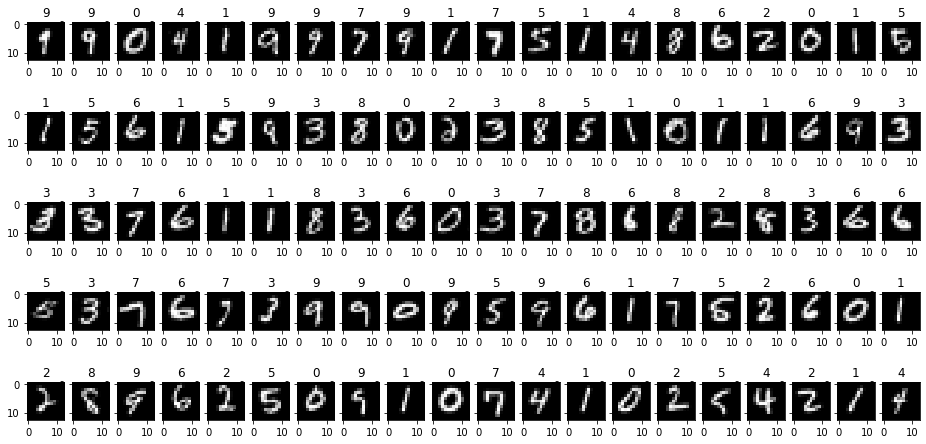

In [11]:
#displaying example training images
imageSideBySide(train_data_post[160000:160100],train_label_post[160000:160100],16)

In [12]:
digitsTrainingSetSize = int(np.ceil(0.8 * len(train_label_post)))
digitsValidationSetSize = int(len(train_label_post) - digitsTrainingSetSize)

xDigitsTrainingSets = []
yDigitsTrainingSets = []
xDigitsValidationSets = []
yDigitsValidationSets = []


for foldIndex in range(1):

    xValidationSet = []
    yValidationSet = []

    for index, digit in enumerate(train_data_post[foldIndex*digitsValidationSetSize:((foldIndex*digitsValidationSetSize)+digitsValidationSetSize)]):
        xValidationSet.append(digit)
        yValidationSet.append(train_label_post[index+(foldIndex*digitsValidationSetSize)])
    
    xTrainingSet = []
    yTrainingSet = []

    start = len(xValidationSet)
 
    for i, digit in enumerate(train_data_post[start:]):
        xTrainingSet.append(digit)
        yTrainingSet.append(train_label_post[i+start])

    xDigitsTrainingSets.append(xTrainingSet)
    yDigitsTrainingSets.append(yTrainingSet)
    xDigitsValidationSets.append(xValidationSet)
    yDigitsValidationSets.append(yValidationSet)

In [13]:
    
def make_windows(img,size):
    #border_patrol = int((size-1)/2)
    
    img_pad = img.copy()
    l,w = img.shape
    windows95 = np.zeros(w-size[1],dtype=object)
    for i, row in enumerate(windows95):
            windows95[i] = img_pad[26:26+size[0],i:i+size[1]]                 
    return windows95



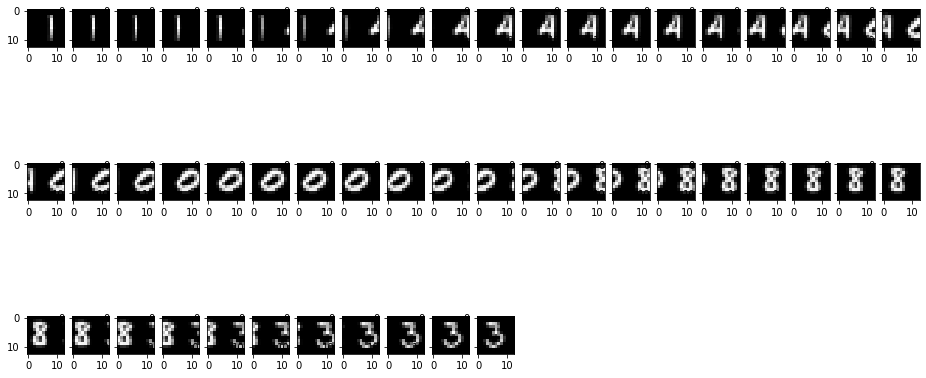

In [14]:
array = make_windows(test_dataset[2],(13,13))
empty = ["" for i in range(len(array))]
imageSideBySide(array,empty,16)




In [15]:
def gauss1D(size):
    ret = np.arange(-size, size + 1, 1) ** 2
    ret = np.exp(-ret * 4 / (size * size) )
    return ret / sum(ret)

def generateGauss2DFilterStack(radius):
    
    rawData = gauss1D(radius)
    #print(rawData)
    rawData = np.outer(rawData, rawData)
    
    filter_ = rawData/np.sum(rawData)
    
#    filter_[radius,radius]/=4
#     filter_[radius,radius-1]/=2
#     filter_[radius,radius+1]/=2
#     filter_[radius+1,radius]/=2
#     filter_[radius-1,radius]/=2

    return filter_

def average_number(array):
    average = np.zeros((array[0].shape),dtype=object)
    for i, digit in enumerate(np.array(array).astype(np.uint8)):
        average+=digit
    average/=len(array)
    average = ((average)/255).astype(float)

    return average

In [17]:
just_zeros = []
count = 0
for i, digit in enumerate(train_data_post):
    if train_label_post[i] == 0:
        just_zeros.append(digit)
        count+=1
    if(count==90):
        break
    

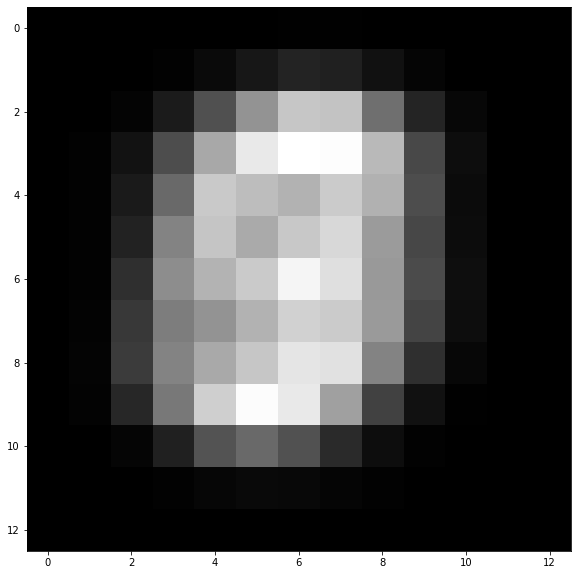

In [19]:
#


average_digits = average_number(train_data_post[160000:161000]+just_zeros)
displayGreyImage(average_digits,"")

def find_digits(windows):
    #filter_ = generateGauss2DFilterStack(6)
    #inverse_filter = np.max(filter_) - filter_
    
    filter_ = average_digits
    inverse_filter = np.max(filter_) - filter_
    
    prev_cost = 0
    focus_digit = 0
    clear_to_add = 0
    last_window = 0
    digits_keep = []
    digits_loc = []
    cost_log = []
    
    for i, window in enumerate(windows):

        positive_cost = lia.norm(filter_*window)
        negative_cost = lia.norm(inverse_filter*window)
        cost = np.exp(positive_cost-negative_cost)-1

        if(i == len(windows)-1):
            last_window = 1
        if(cost>prev_cost):
            focus_digit = i
            clear_to_add=1
        if(clear_to_add and cost<prev_cost):
            clear_to_add=0
            digits_keep.append(windows[focus_digit])
            digits_loc.append(i)
        if(cost>prev_cost and last_window and cost>0.2):
            digits_keep.append(windows[focus_digit])
            digits_loc.append(i)
            
        cost_log.append(cost)
        prev_cost = cost    

    #quick fix
    for f in range(2):
        i=0
        while i < len(digits_loc):
            try:
                digits_loc[i+1]
            except:
                break
            if(digits_loc[i+1]-digits_loc[i]<10):
                cost_i_1 = cost_log[digits_loc[i+1]]
                cost_i = cost_log[digits_loc[i]]
                if(cost_i_1>cost_i):
                    digits_keep.pop(i)
                    digits_loc.pop(i)
                if(cost_i_1<cost_i):
                    digits_keep.pop(i+1)
                    digits_loc.pop(i+1)

            i+=1

        
        
            
        
    #displayGreyImage(filter_,"")
    return digits_keep, digits_loc

In [20]:
wrong =0 
wrong_arr = []
wrong_arr_index = []
correct = []
for i, img in enumerate(train_dataset[0:30000]):

    foundings, loc = find_digits(make_windows(img,(13,13)))
    correct.append(foundings)
    predicted_digits = len(foundings)
    real_num_digits = 5-list(train_labels[i]).count(10)
    if(predicted_digits!=real_num_digits):

        wrong+=1
        wrong_arr.append(foundings)
        wrong_arr_index.append(i)
        

print("Wrong =",wrong/len(train_dataset[0:30000])*100, "%")

Wrong = 0.45666666666666667 %


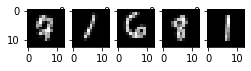

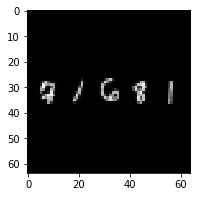

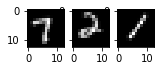

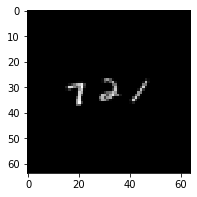

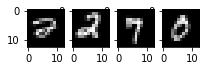

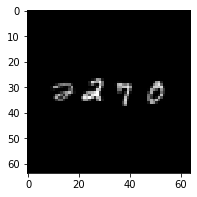

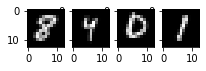

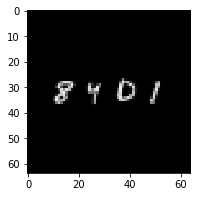

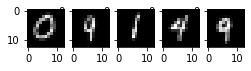

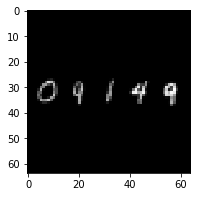

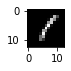

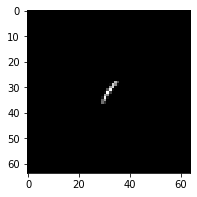

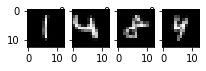

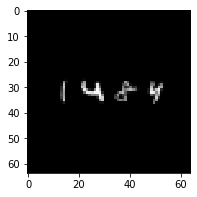

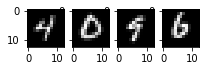

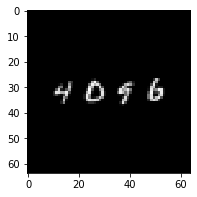

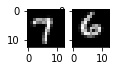

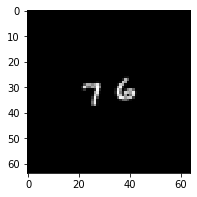

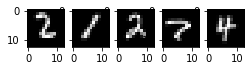

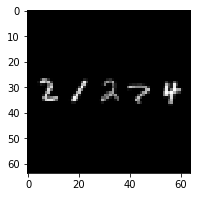

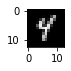

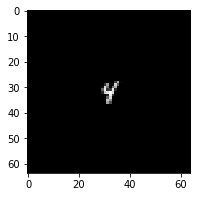

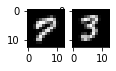

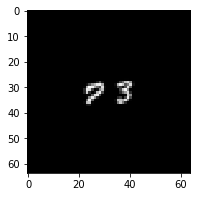

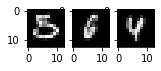

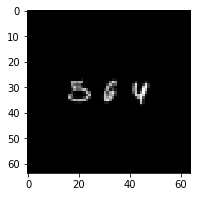

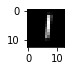

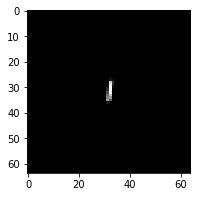

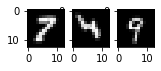

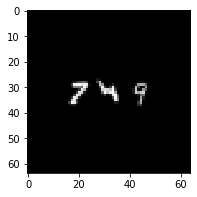

split


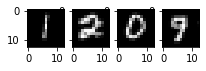

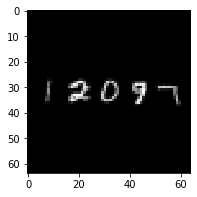

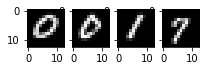

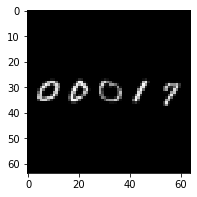

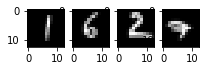

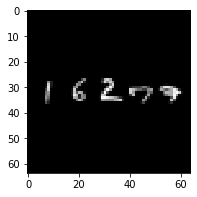

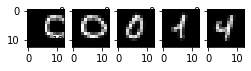

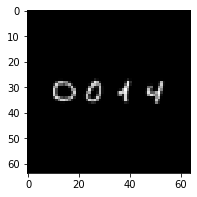

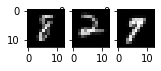

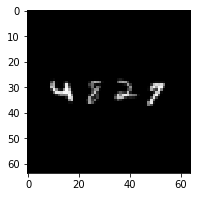

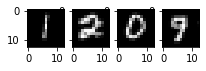

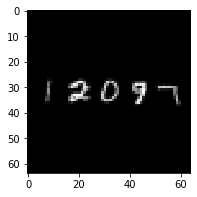

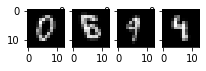

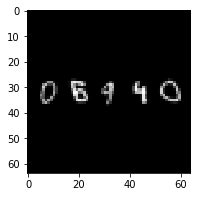

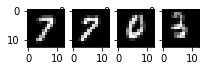

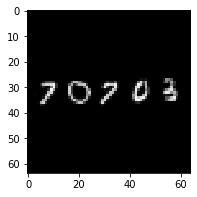

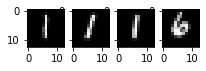

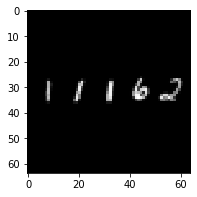

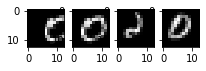

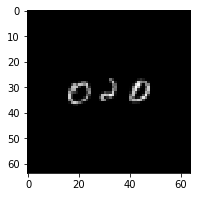

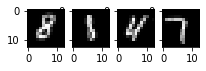

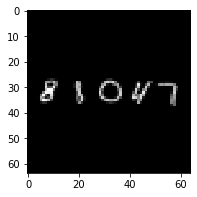

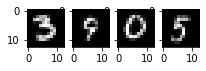

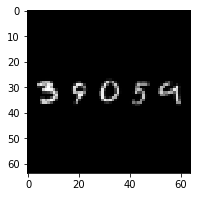

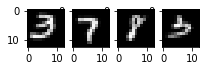

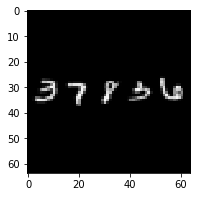

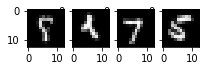

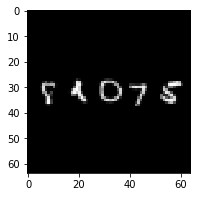

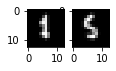

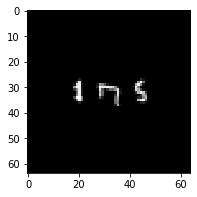

In [21]:
for i in np.random.randint((len(correct)), size=15):
    imageSideBySide(correct[i],empty,16)
    displayGreyWindows(train_dataset[i],"")
print("split")
for i in np.random.randint((len(wrong_arr)), size=15):
    imageSideBySide(wrong_arr[i],empty,16)
    displayGreyWindows(train_dataset[wrong_arr_index[i]],"")

# NN Stuff

In [366]:
#deprecated
def create_batches(input_array, label_array, batch_size):
    batched = []
    label_batched = []
    for i in range(np.floor(len(input_array)/batch_size).astype(int)):
        batched.append(np.expand_dims((np.array(input_array[i*batch_size:i*batch_size+batch_size])/255*2-1).astype(np.single),axis=1))
        label_batched.append(label_array[i*batch_size:i*batch_size+batch_size])
    return np.array(batched), label_batched

In [178]:
#trainloader = torch.utils.data.DataLoader(xTrainingSet, batch_size=32,
#                                          shuffle=False, num_workers=2)


In [186]:
batch_size = 32
training_set, training_set_labels = create_batches(xTrainingSet,yTrainingSet, batch_size)

validation_set, validation_set_labels = create_batches(xValidationSet,yValidationSet, batch_size)

In [190]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, h_layers):
        self.num_layers = len(h_layers)
        self.h_layers = h_layers      
        self.convs = []
        
        super(Net, self).__init__()
        for i, n in enumerate(self.h_layers):
            if i == 0:
                self.convs.append(nn.Conv2d(1, n, 3))
            else:
                print(h_layers[i-1],n)
                self.convs.append(nn.Conv2d(self.h_layers[i-1], n, 3))

        self.fc1 = nn.Linear(self.h_layers[-1]**2 , 10)

    def forward(self, x):
        #print(x)
        for i in range(len(self.h_layers)):
            x = F.relu(self.convs[i](x))
        x = x.view(-1, self.h_layers[-1]**2)
        x = self.fc1(x)
        return x

h_layers = ([batch_size,64])
net = Net(h_layers)

32 64


In [191]:
import torch
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [192]:

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(training_set):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(data)
        labels = training_set_labels[i] 
        # zero the parameter gradients
        optimizer.zero_grad()
        #print(inputs.shape,labels)
        # forward + backward + optimize
        outputs = net(inputs)
        #print(torch.from_numpy(np.array(labels).astype(np.longlong)))
        loss = criterion(outputs, torch.from_numpy(np.array(labels).astype(np.longlong)))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: shape '[-1, 4096]' is invalid for input of size 165888

In [152]:
correct = 0
total = 0
with torch.no_grad():
    for i, data in enumerate(validation_set):
        images = torch.from_numpy(data)
        labels = validation_set_labels[i]
        labels = torch.from_numpy(np.array(labels).astype(np.longlong))
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if (int(predicted[0]) != int(labels[0])):
            None
            #displayGreyImage(np.squeeze(images)[0],f"Predicted: {predicted[0]}, Target: {labels[0]}")
print(f"Accuracy of the network on the {total} test images: {(100 * correct / total)}")

Accuracy of the network on the 33568 test images: 94.93863203050525
